# **Autoencoders**


In [14]:
# importing the all libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam


In [15]:
#loding the data set
(X_train,y_train),(X_test,y_test)= cifar10.load_data()

In [16]:
#splitting the data into the train test
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

[6]
(32, 32, 3)


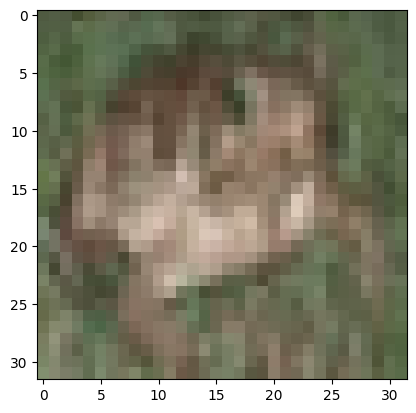

In [17]:
# ckecking the image from the data set
i = np.random.randint(0, 50000)
print(y_train[i])
print(X_test[0].shape)
plt.imshow(X_train[i].reshape(32, 32, 3))
plt.show()

In [18]:
# we need to normalize the  data
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [19]:
# checking the values in the xtrain and the xtest
X_train[0].min() , X_train[0].max()

(np.float32(0.0), np.float32(1.0))

In [20]:
# compressing the x_train  data into the 2d array Flatend
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2] * X_train.shape[3])
X_train.shape

(50000, 3072)

In [21]:
# compressing the x_test data into the 2d array Flatend
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]* X_test.shape[2] * X_test.shape[3])
X_test.shape

(10000, 3072)

In [22]:
# Adding the noice to the data set
noise_factor = 0.01
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

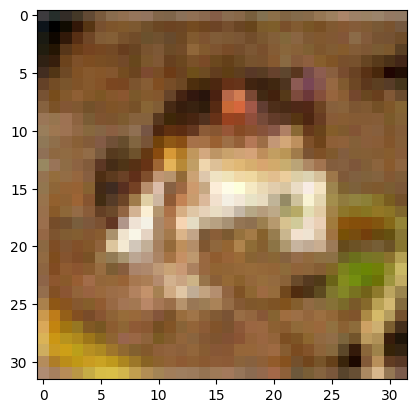

In [23]:
# checking the image
plt.imshow(np.clip(X_train_noisy[0].reshape(32, 32, 3), 0, 1))
plt.show()

In [13]:
# building the model
# encode
autoencoder = Sequential()
# Encoder
autoencoder.add(Input(shape=(3072,)))
autoencoder.add(Dense(units=256, activation='relu'))
autoencoder.add(Dense(units=64, activation='relu'))

# Decoder
autoencoder.add(Dense(units=256, activation='relu'))
autoencoder.add(Dense(units=3072, activation='sigmoid'))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(X_train, X_train, epochs=10, batch_size=1000)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 270ms/step - accuracy: 9.3031e-04 - loss: 0.6786
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 218ms/step - accuracy: 0.0022 - loss: 0.6353
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 234ms/step - accuracy: 0.0026 - loss: 0.6212
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 245ms/step - accuracy: 0.0034 - loss: 0.6132
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 225ms/step - accuracy: 0.0030 - loss: 0.6084
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 238ms/step - accuracy: 0.0038 - loss: 0.6035
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 242ms/step - accuracy: 0.0045 - loss: 0.6008
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 242ms/step - accuracy: 0.0035 - loss: 0.6022
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 238ms/step - accuracy: 0.0050 - loss: 0.5943
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 238ms/step - accuracy: 0.0039 - loss: 0.5922


In [24]:
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3072)           │       789,504 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,827,842 (18.42 MB)

 Trainable params: 1,609,280 (6.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,218,562 (12.28 MB)

In [25]:
autoencoder.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>]

In [26]:
X_test[0].shape

(3072,)

In [27]:
X_test[0].reshape(1,-1)
X_test[0].shape

(3072,)

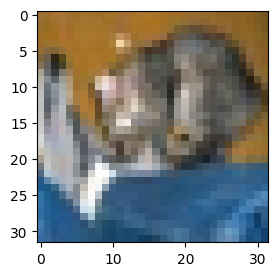

In [28]:
plt.figure(figsize=(3,3))
plt.imshow(X_test[0].reshape(32,32,3))
plt.show()

In [30]:
encoder = Model(inputs=autoencoder.inputs,outputs=autoencoder.get_layer('dense_1').output)
encoder.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 803,136 (3.06 MB)

 Trainable params: 803,136 (3.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_test[0].reshape(1,-1).shape

In [ ]:
encoded_image = encoder.predict(X_test[0].reshape(1,-1))

In [ ]:
plt.imshow(encoded_image)
plt.show()

In [ ]:
predicted_image = autoencoder.predict(X_test[0].reshape(1,-1))
predicted_image.shape

In [ ]:
plt.imshow(predicted_image.reshape(32,32,3))
plt.show()

In [ ]:
# Add noise to a test image
noisy_image = X_test[0].reshape(1, -1) + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test[0].reshape(1, -1).shape)
noisy_image = np.clip(noisy_image, 0, 1) # Clip values to the valid range

# Get the denoised image from the autoencoder
denoised_image = autoencoder.predict(noisy_image)

plt.subplot(1,2,1)
plt.title('Noisy')
plt.imshow(noisy_image.reshape(32,32,3))

plt.subplot(1,2,2)
plt.title('Denoised')
plt.imshow(denoised_image.reshape(32,32,3))

plt.show()

# **2 Question**

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [32]:
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

100%|██████████| 170M/170M [00:10<00:00, 15.8MB/s]


In [39]:
class VAE(nn.Module):
    def __init__(self, latent_dim=128):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim

        # Encoder
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 32 * 3, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
        )
        self.fc_mu = nn.Linear(512, latent_dim)
        self.fc_logvar = nn.Linear(512, latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 32 * 32 * 3),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

In [35]:
def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

In [36]:
 def forward(self, x):
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

In [37]:
def vae_loss(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 32*32*3), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = vae_loss(recon_batch, data, mu, logvar)
        loss.backward()
        total_loss += loss.item()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader.dataset):.4f}")

In [ ]:
def show_reconstructions(model, data_loader):
    model.eval()
    data_iter = iter(data_loader)
    images, _ = next(data_iter)
    images = images.to(device)
    with torch.no_grad():
        recon_images, _, _ = model(images)
    recon_images = recon_images.view(-1, 3, 32, 32).cpu()

    fig, axes = plt.subplots(2, 8, figsize=(15, 4))
    for i in range(8):
        axes[0, i].imshow(images[i].permute(1, 2, 0).cpu())
        axes[0, i].set_title("Original")
        axes[0, i].axis('off')

        axes[1, i].imshow(recon_images[i].permute(1, 2, 0))
        axes[1, i].set_title("Reconstructed")
        axes[1, i].axis('off')
    plt.show()

show_reconstructions(model, train_loader)